## Pareto Optimal from Parfait_ML

We use the "most accurate hyperparameter" to move on to the next step: masking different features.

In [ ]:
models = ["LR","DT","RF","SV"]
datasets = [("census", "gender"), ("census", "race"), ("credit", "gender"), ("bank","age"), ("compas","gender"), ("compas","race")]
algorithms = ["mutation"]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def is_pareto_efficient(costs, return_mask = True):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :param return_mask: True to return a mask
    :return: An array of indices of pareto-efficient points.
        If return_mask is True, this will be an (n_points, ) boolean array
        Otherwise it will be a (n_efficient_points, ) integer array of indices.
    """
    is_efficient = np.arange(costs.shape[0])
    n_points = costs.shape[0]
    next_point_index = 0  # Next index in the is_efficient array to search for
    while next_point_index<len(costs):
        nondominated_point_mask = np.any(costs<costs[next_point_index], axis=1)
        nondominated_point_mask[next_point_index] = True
        is_efficient = is_efficient[nondominated_point_mask]  # Remove dominated points
        costs = costs[nondominated_point_mask]
        next_point_index = np.sum(nondominated_point_mask[:next_point_index])+1
    if return_mask:
        is_efficient_mask = np.zeros(n_points, dtype = bool)
        is_efficient_mask[is_efficient] = True
        return is_efficient_mask
    else:
        return is_efficient

/tmp/ipykernel_2291/4118781426.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure();


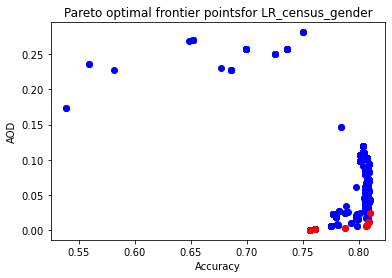

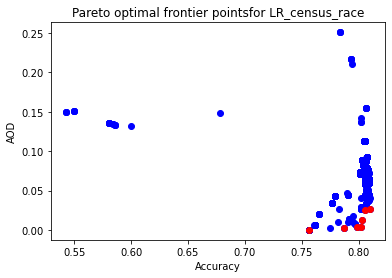

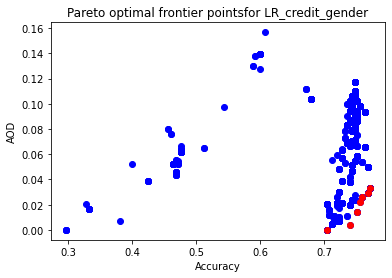

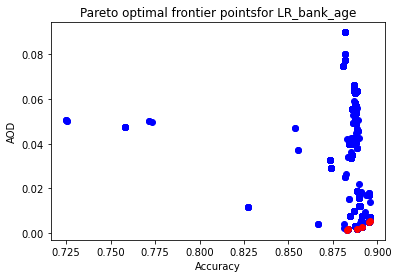

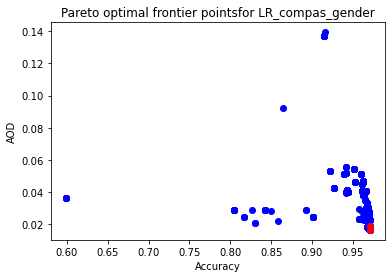

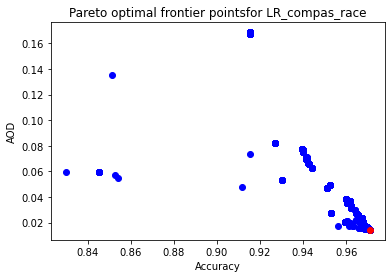

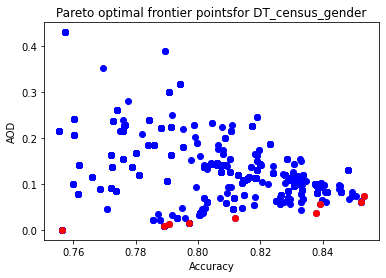

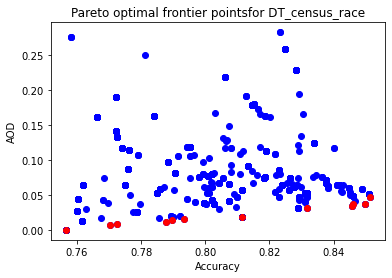

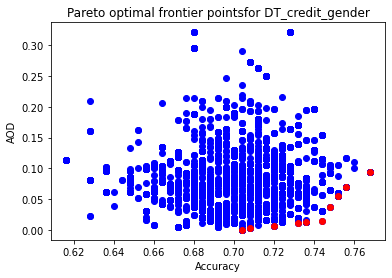

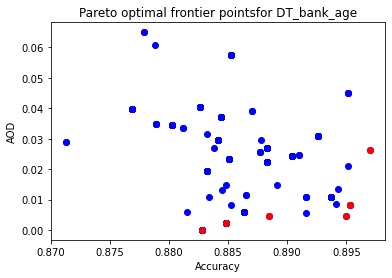

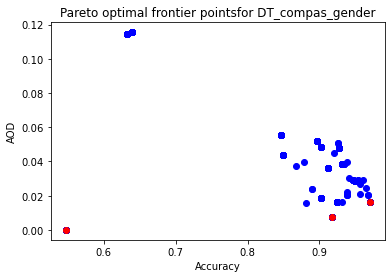

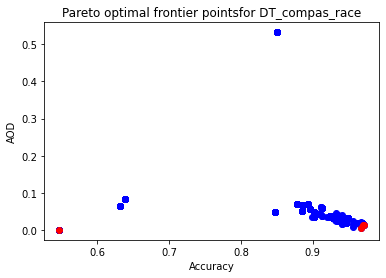

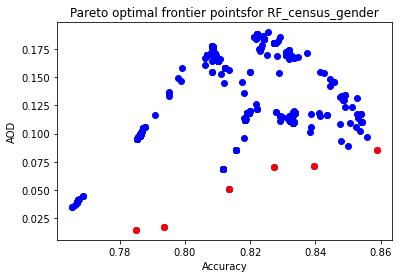

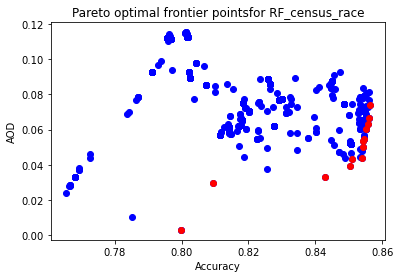

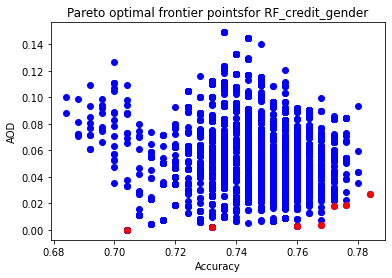

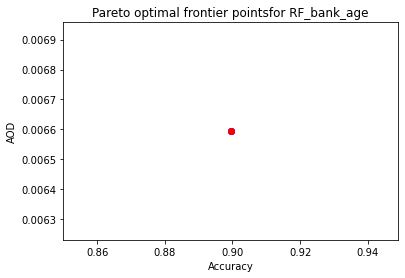

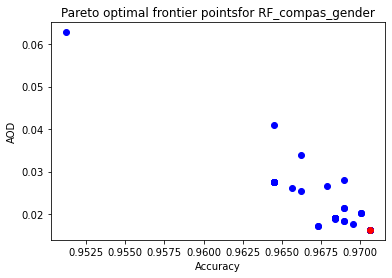

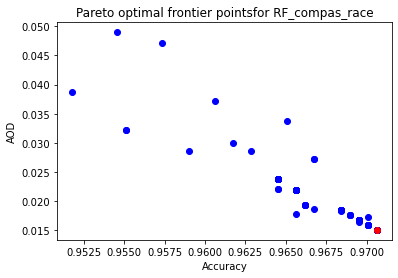

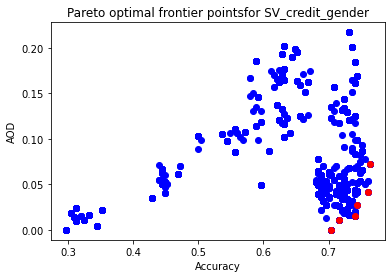

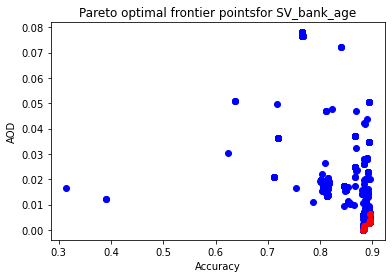

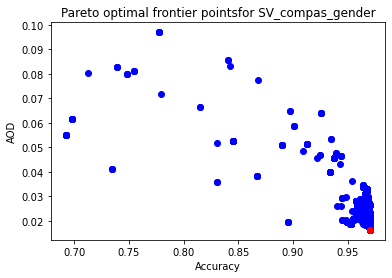

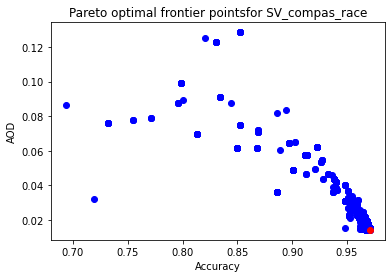

<Figure size 432x288 with 0 Axes>

In [20]:
for m in models:
    for d in datasets:
        for a in algorithms:
            if f"{m}_{d[0]}_{d[1]}_{a}.csv" == "SV_census_gender_mutation.csv" or \
            f"{m}_{d[0]}_{d[1]}_{a}.csv" == "SV_census_race_mutation.csv":
                continue
            df = pd.read_csv("../Dataset" + "/" + f"{m}_{d[0]}_{d[1]}_{a}.csv")
            plt.scatter(df["score"],df["AOD"], color='blue')
            df_masking = df.copy()
            df_masking["score"] = -df_masking["score"] # we want to find maximium for score

            mask = is_pareto_efficient(df_masking[["score","AOD"]].to_numpy(), True)
            plt.scatter(df["score"][mask],df["AOD"][mask], color='red');
            plt.xlabel("Accuracy");
            plt.ylabel("AOD");
            plt.title(f"Pareto optimal frontier pointsfor {m}_{d[0]}_{d[1]}");
            plt.figure();

In [26]:
def getMostAccurateConfig(model,dataset,sensitive_feature,algo):
    df = pd.read_csv("../Dataset" + "/" + f"{model}_{dataset}_{sensitive_feature}_{algo}.csv")
    return df[df['score'] == df['score'].max()].iloc[0].inp

In [27]:
getMostAccurateConfig("SV","compas","race","mutation")

'[0, 0, 1, 0.0052810121173558315, 8.695497589882397, 0, 0, 8.504849590638829, 0, 1, 0, 999]'